# Grafos y distancia mas corta en grafos (Networkx)

In [2]:
# Importar librerias e inicializar datos

from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

######################
### Definir grafo ####

# Nodos
nodes = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Edges (bordes)
edges = {(0, 1), (0, 2), (0, 3), (1, 4),
         (1, 6), (2, 1), (2, 3), (2, 5),
         (3, 5), (4, 2), (5, 7), (5, 8),
         (6, 4), (6, 7), (6, 9), (7, 4),
         (7, 9), (8, 3), (8, 7), (8, 9)}


# Peso entre nodos (peso asignado)
## OJO: Cuidado con los grafos "dirigdos" (orden) y "no dirigidos" (sin orden)
distance = {(0, 1): 40, (0, 2):  8, (0, 3): 10, (1, 4):  6,
            (1, 6): 10, (2, 1):  4, (2, 3): 12, (2, 5):  2,
            (3, 5):  1, (4, 2):  2, (5, 7):  4, (5, 8):  3,
            (6, 4):  8, (6, 7): 20, (6, 9):  1, (7, 4):  1,
            (7, 9): 20, (8, 3):  6, (8, 7): 10, (8, 9):  2}

### Grafos no dirigidos

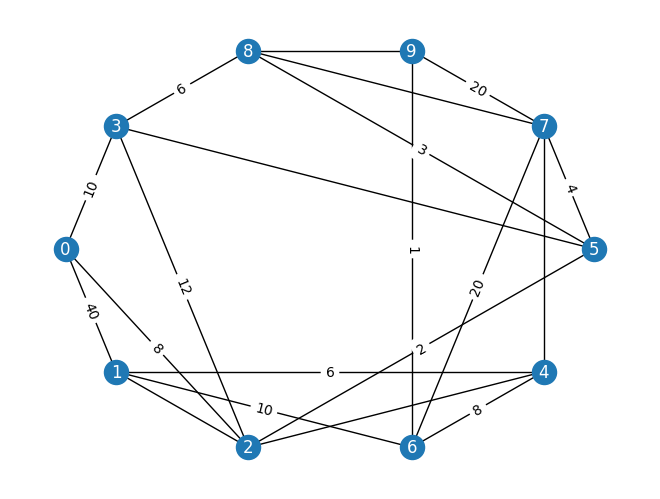

In [3]:
# Ejemplo de grafo 

# definir grafo no dirigido
G = nx.Graph(edges)

# Añadir peso a cada borde (edge)
for i,j in G.edges():
    try:
        G[i][j]["weight"] = distance[(i,j)]
    except:
        pass

Gb = G.copy() # copia de backup del grafo

# Tipo de grafica
pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spiral_layout(G)

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos,font_color='white',with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

Nodo origen: 8  - Nodo destino: 5
Cantidad de caminos simples: 185
Ejemplo de camino simple: [8, 9, 7, 5]
Cantidad de caminos simples (pairwise): 185
Ejemplo de camino pairwise: [(8, 9), (9, 7), (7, 5)]
[SOLUTION] camino no dirigido: [8, 5]


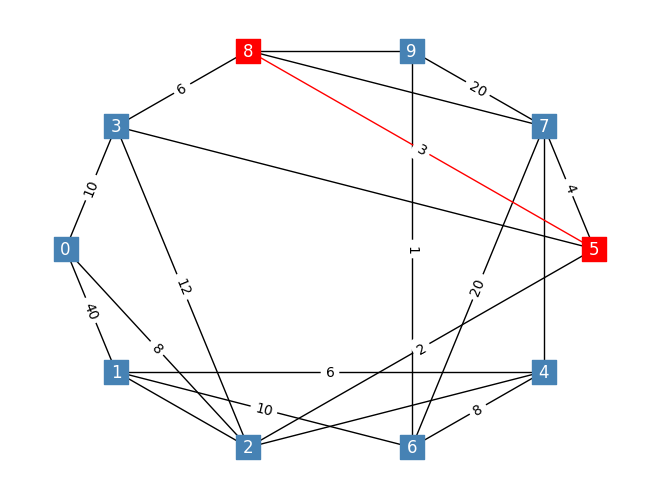

In [4]:
# Ejemplo de grafo con la seleccion de la ruta mas corta (segun peso definido)

origin_node = 8
destin_node = 5
print('Nodo origen:',origin_node,' - Nodo destino:',destin_node)

############################

# definir grafo no dirigido
G = nx.Graph(edges)

# Añadir peso a cada borde (edge)
for i,j in G.edges():
    try:
        G[i][j]["weight"] = distance[(i,j)]
    except:
        pass

Gb = G.copy() # copia de backup del grafo

# Tipo de grafica
pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spiral_layout(G)

#############################
# Exploracion 

# Calcular caminos simples para ir de nodo origen a destino
simple_paths = []
for pathi in nx.all_simple_paths(G, source=origin_node, target=destin_node):
    simple_paths.append(pathi)
print('Cantidad de caminos simples:',len(simple_paths))
print('Ejemplo de camino simple:',simple_paths[0])


# Calcular caminos simples para ir de nodo origen a destino - segun pares de nodos
simple_paths_pair = []
for path_pairs in map(nx.utils.pairwise, nx.all_simple_paths(G, source=origin_node, target=destin_node)):
    simple_paths_pair.append(path_pairs)
print('Cantidad de caminos simples (pairwise):',len(simple_paths_pair))
print('Ejemplo de camino pairwise:',list(simple_paths_pair[0]))

###############################
# Rutas mas cortas

# Calcular distancia mas corta
path = nx.shortest_path(G, source = origin_node, target = destin_node)
#path = nx.dijkstra_path(G, source = origin_node, target = destin_node)

# Solucion
print('[SOLUTION] camino no dirigido:',path)

edges_path = list(zip(path,path[1:]))
edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed
edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

### Grafos no dirigidos restringidos

Se considerarán nodos o edges que NO se pueden pasar en la busqueda de ruta mas corta

NOTA: En OPCION 1 no se muestran los nodos & edges removidos. En la OPCION 2 se muestra la ruta mas corta pero se vuelve a incorporar los nodos & edges removidos para el calculo

Nodo origen: 8  - Nodo destino: 5
---------------------------
Remover nodo: {3}
Remover edges direccional: {(1, 2)}
Remover edges no direccional: {}
---------------------------
Cantidad de caminos simples: 31
Ejemplo de camino simple: [8, 9, 7, 5]
Cantidad de caminos simples (pairwise): 31
Ejemplo de camino pairwise: [(8, 9), (9, 7), (7, 5)]
[SOLUTION] camino no dirigido: [8, 5]


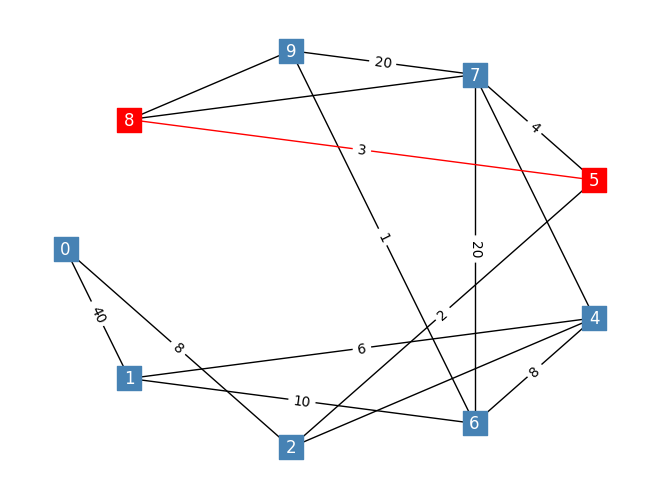

In [5]:
# [OPCION 1] Ejemplo de grafo con la seleccion de la ruta mas corta (segun peso definido)

origin_node = 8
destin_node = 5
print('Nodo origen:',origin_node,' - Nodo destino:',destin_node)

############################

# definir grafo no dirigido
G = nx.Graph(edges)

# Añadir peso a cada borde (edge)
for i,j in G.edges():
    try:
        G[i][j]["weight"] = distance[(i,j)]
    except:
        pass

Gb = G.copy() # copia de backup del grafo

# Remover nodos y edges
rem_nodos = {3}
rem_edges_no_dir = {}
rem_edges_dir = {(1,2)}

print('---------------------------')

# Remueve nodo de grafo
print('Remover nodo:',rem_nodos)
for nodor in rem_nodos:
    G.remove_node(nodor)

# Remueve edge (direccional) de grafo
print('Remover edges direccional:',rem_edges_dir)
for edger in rem_edges_dir:
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass

# Remueve edge (no direccional) de grafo
print('Remover edges no direccional:',rem_edges_no_dir)
for edger in rem_edges_no_dir:
    # Probar remover ambas direcciones (A,B) y (B,A)
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass
    
    try:
        G.remove_edge(edger[1],edger[0])
    except:
        pass

print('---------------------------')

#############################
# Exploracion 

# Calcular caminos simples para ir de nodo origen a destino
simple_paths = []
for pathi in nx.all_simple_paths(G, source=origin_node, target=destin_node):
    simple_paths.append(pathi)
print('Cantidad de caminos simples:',len(simple_paths))
print('Ejemplo de camino simple:',simple_paths[0])


# Calcular caminos simples para ir de nodo origen a destino - segun pares de nodos
simple_paths_pair = []
for path_pairs in map(nx.utils.pairwise, nx.all_simple_paths(G, source=origin_node, target=destin_node)):
    simple_paths_pair.append(path_pairs)
print('Cantidad de caminos simples (pairwise):',len(simple_paths_pair))
print('Ejemplo de camino pairwise:',list(simple_paths_pair[0]))

###############################
# Rutas mas cortas

# Calcular distancia mas corta
path = nx.shortest_path(G, source = origin_node, target = destin_node)
#path = nx.dijkstra_path(G, source = origin_node, target = destin_node)

# Solucion
print('[SOLUTION] camino no dirigido:',path)


#############################
# Tipo de grafica

pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spiral_layout(G)


edges_path = list(zip(path,path[1:]))
edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed
edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

Nodo origen: 8  - Nodo destino: 5
---------------------------
Remover nodo: {3}
Remover edges direccional: {(1, 2)}
Remover edges no direccional: {}
---------------------------
Cantidad de caminos simples: 31
Ejemplo de camino simple: [8, 9, 7, 5]
Cantidad de caminos simples (pairwise): 31
Ejemplo de camino pairwise: [(8, 9), (9, 7), (7, 5)]
[SOLUTION] camino no dirigido: [8, 5]


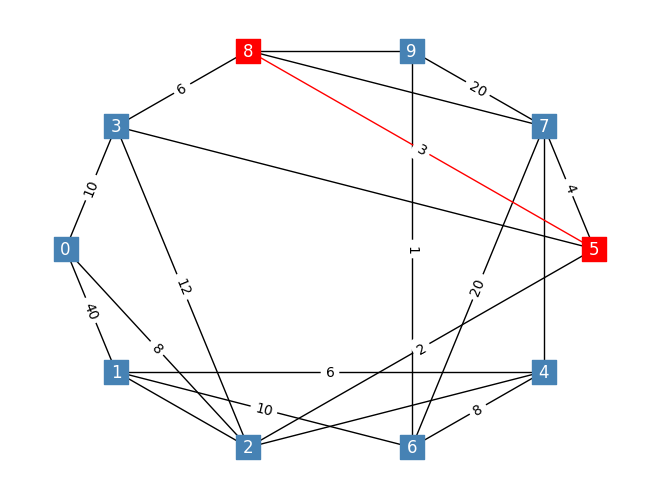

In [15]:
# [OPCION 2] Ejemplo de grafo con la seleccion de la ruta mas corta (segun peso definido)

origin_node = 8
destin_node = 5
print('Nodo origen:',origin_node,' - Nodo destino:',destin_node)

############################

# definir grafo no dirigido
G = nx.Graph(edges)

# Añadir peso a cada borde (edge)
for i,j in G.edges():
    try:
        G[i][j]["weight"] = distance[(i,j)]
    except:
        pass

Gb = G.copy() # copia de backup del grafo

# Remover nodos y edges
rem_nodos = {3}
rem_edges_no_dir = {}
rem_edges_dir = {(1,2)}

print('---------------------------')

# Remueve nodo de grafo
print('Remover nodo:',rem_nodos)
for nodor in rem_nodos:
    G.remove_node(nodor)

# Remueve edge (direccional) de grafo
print('Remover edges direccional:',rem_edges_dir)
for edger in rem_edges_dir:
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass

# Remueve edge (no direccional) de grafo
print('Remover edges no direccional:',rem_edges_no_dir)
for edger in rem_edges_no_dir:
    # Probar remover ambas direcciones (A,B) y (B,A)
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass
    
    try:
        G.remove_edge(edger[1],edger[0])
    except:
        pass

print('---------------------------')

#############################
# Exploracion 

# Calcular caminos simples para ir de nodo origen a destino
simple_paths = []
for pathi in nx.all_simple_paths(G, source=origin_node, target=destin_node):
    simple_paths.append(pathi)
print('Cantidad de caminos simples:',len(simple_paths))
print('Ejemplo de camino simple:',simple_paths[0])


# Calcular caminos simples para ir de nodo origen a destino - segun pares de nodos
simple_paths_pair = []
for path_pairs in map(nx.utils.pairwise, nx.all_simple_paths(G, source=origin_node, target=destin_node)):
    simple_paths_pair.append(path_pairs)
print('Cantidad de caminos simples (pairwise):',len(simple_paths_pair))
print('Ejemplo de camino pairwise:',list(simple_paths_pair[0]))

###############################
# Rutas mas cortas

# Calcular distancia mas corta
path = nx.shortest_path(G, source = origin_node, target = destin_node)
#path = nx.dijkstra_path(G, source = origin_node, target = destin_node)

# Solucion
print('[SOLUTION] camino no dirigido:',path)


# Restablecer a grafo original - usar backup
G = Gb.copy()

#############################
# Tipo de grafica

pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spiral_layout(G)

# Rutas
edges_path = list(zip(path,path[1:]))
edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed
edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

### Grafos dirigidos

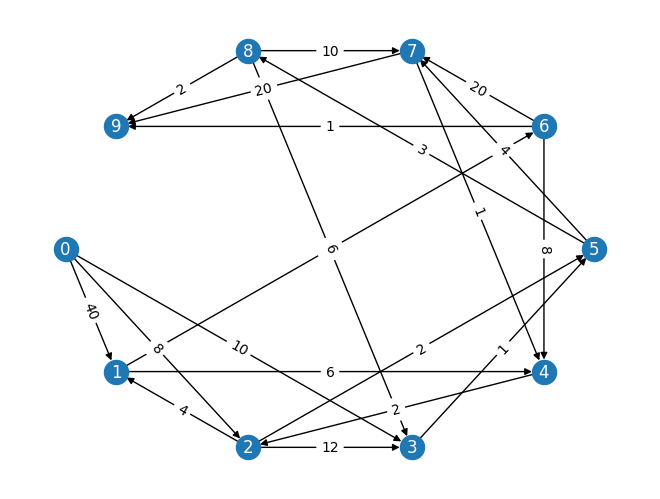

In [6]:
# Ejemplo de grafo dirigido

G = nx.DiGraph()

for nodo in nodes:
    G.add_node(nodo)

for i,j in distance:
    G.add_edge(i,j,weight=distance[(i,j)])

Gb = G.copy() # copia de backup del grafo

# Tipo de grafica
pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spiral_layout(G)

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos,font_color='white',with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

Nodo origen: 8  - Nodo destino: 5
Cantidad de caminos simples: 3
Ejemplo de camino simple: [8, 3, 5]
Cantidad de caminos simples (pairwise): 3
Ejemplo de camino pairwise: [(8, 3), (3, 5)]
[SOLUTION] camino dirigido: [8, 3, 5]


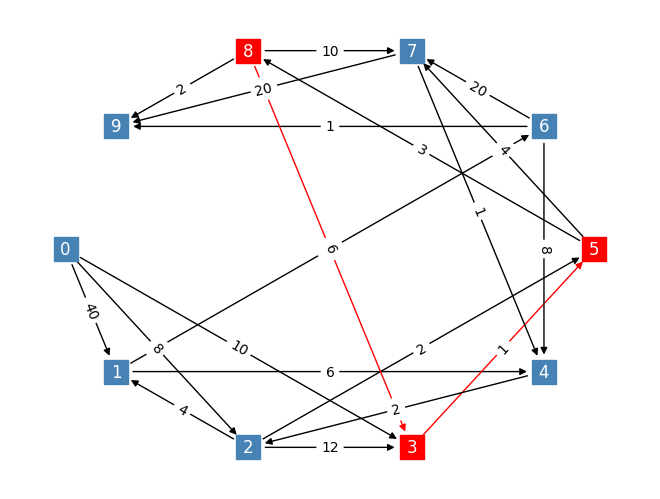

In [7]:
# Ejemplo de grafo dirigido con calculo de ruta mas corta

origin_node = 8
destin_node = 5
print('Nodo origen:',origin_node,' - Nodo destino:',destin_node)

#############################

# definir grafo dirigido
G = nx.DiGraph()

for nodo in nodes:
    G.add_node(nodo)

for i,j in distance:
    G.add_edge(i,j,weight=distance[(i,j)])

Gb = G.copy() # copia de backup del grafo

#############################
# Exploracion 

# Calcular caminos simples para ir de nodo origen a destino
simple_paths = []
for pathi in nx.all_simple_paths(G, source=origin_node, target=destin_node):
    simple_paths.append(pathi)
print('Cantidad de caminos simples:',len(simple_paths))
print('Ejemplo de camino simple:',simple_paths[0])


# Calcular caminos simples para ir de nodo origen a destino - segun pares de nodos
simple_paths_pair = []
for path_pairs in map(nx.utils.pairwise, nx.all_simple_paths(G, source=origin_node, target=destin_node)):
    simple_paths_pair.append(path_pairs)
print('Cantidad de caminos simples (pairwise):',len(simple_paths_pair))
print('Ejemplo de camino pairwise:',list(simple_paths_pair[0]))

##################################
# Rutas mas cortas

# Calcular distancia mas corta
path = nx.shortest_path(G, source = origin_node, target = destin_node)
#path = nx.dijkstra_path(G, source = origin_node, target = destin_node)

# Solucion
print('[SOLUTION] camino dirigido:',path)

edges_path = list(zip(path,path[1:]))
edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed
edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

### Grafos dirigidos restringidos

Se considerarán nodos o edges que NO se pueden pasar en la busqueda de ruta mas corta

NOTA: En OPCION 1 no se muestran los nodos & edges removidos. En la OPCION 2 se muestra la ruta mas corta pero se vuelve a incorporar los nodos & edges removidos para el calculo

Nodo origen: 8  - Nodo destino: 5
---------------------------
Remover nodo: {3}
Remover edges direccional: {(1, 2)}
Remover edges no direccional: {}
---------------------------
Cantidad de caminos simples: 1
Ejemplo de camino simple: [8, 7, 4, 2, 5]
Cantidad de caminos simples (pairwise): 1
Ejemplo de camino pairwise: [(8, 7), (7, 4), (4, 2), (2, 5)]
[SOLUTION] camino dirigido: [8, 7, 4, 2, 5]


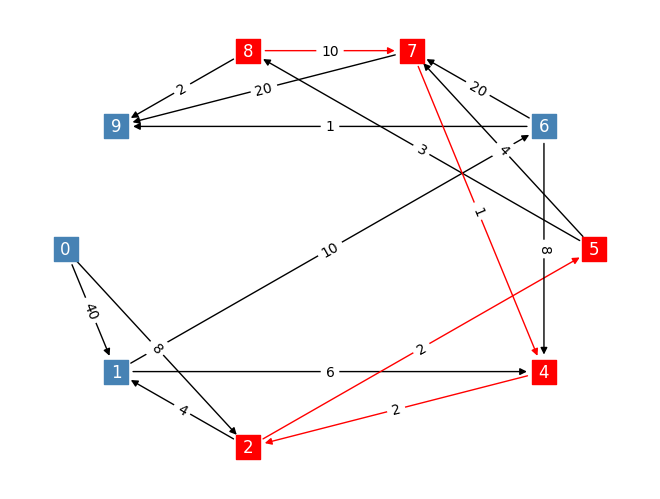

In [8]:
# [OPCION 1] Ejemplo de grafo dirigido con calculo de ruta mas corta

origin_node = 8
destin_node = 5
print('Nodo origen:',origin_node,' - Nodo destino:',destin_node)

#############################

# definir grafo dirigido
G = nx.DiGraph()

for nodo in nodes:
    G.add_node(nodo)

for i,j in distance:
    G.add_edge(i,j,weight=distance[(i,j)])

Gb = G.copy() # copia de backup del grafo

# Remover nodos y edges
rem_nodos = {3}
rem_edges_no_dir = {}
rem_edges_dir = {(1,2)}

print('---------------------------')

# Remueve nodo de grafo
print('Remover nodo:',rem_nodos)
for nodor in rem_nodos:
    G.remove_node(nodor)

# Remueve edge (direccional) de grafo
print('Remover edges direccional:',rem_edges_dir)
for edger in rem_edges_dir:
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass

# Remueve edge (no direccional) de grafo
print('Remover edges no direccional:',rem_edges_no_dir)
for edger in rem_edges_no_dir:
    # Probar remover ambas direcciones (A,B) y (B,A)
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass
    
    try:
        G.remove_edge(edger[1],edger[0])
    except:
        pass

print('---------------------------')

#############################
# Exploracion 

# Calcular caminos simples para ir de nodo origen a destino
simple_paths = []
for pathi in nx.all_simple_paths(G, source=origin_node, target=destin_node):
    simple_paths.append(pathi)
print('Cantidad de caminos simples:',len(simple_paths))
print('Ejemplo de camino simple:',simple_paths[0])


# Calcular caminos simples para ir de nodo origen a destino - segun pares de nodos
simple_paths_pair = []
for path_pairs in map(nx.utils.pairwise, nx.all_simple_paths(G, source=origin_node, target=destin_node)):
    simple_paths_pair.append(path_pairs)
print('Cantidad de caminos simples (pairwise):',len(simple_paths_pair))
print('Ejemplo de camino pairwise:',list(simple_paths_pair[0]))

##################################
# Rutas mas cortas

# Calcular distancia mas corta
path = nx.shortest_path(G, source = origin_node, target = destin_node)
#path = nx.dijkstra_path(G, source = origin_node, target = destin_node)

# Solucion
print('[SOLUTION] camino dirigido:',path)

edges_path = list(zip(path,path[1:]))
edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed
edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()

Nodo origen: 8  - Nodo destino: 5
---------------------------
Remover nodo: {3}
Remover edges direccional: {(1, 2)}
Remover edges no direccional: {}
---------------------------
Cantidad de caminos simples: 1
Ejemplo de camino simple: [8, 7, 4, 2, 5]
Cantidad de caminos simples (pairwise): 1
Ejemplo de camino pairwise: [(8, 7), (7, 4), (4, 2), (2, 5)]
[SOLUTION] camino dirigido: [8, 7, 4, 2, 5]


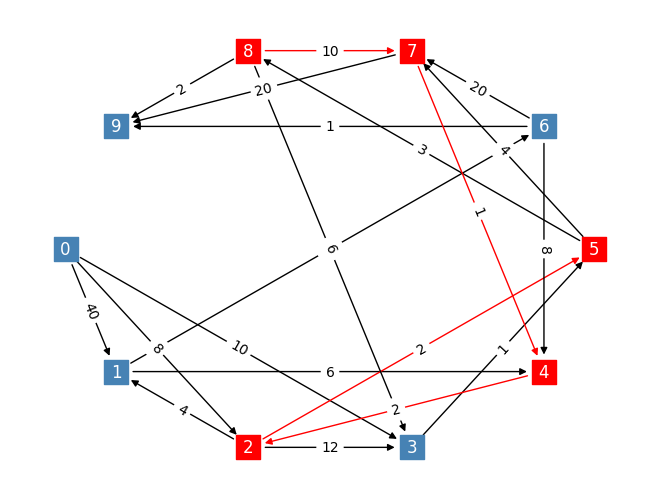

In [10]:
# [OPCION 2] Ejemplo de grafo dirigido con calculo de ruta mas corta

origin_node = 8
destin_node = 5
print('Nodo origen:',origin_node,' - Nodo destino:',destin_node)

#############################

# definir grafo dirigido
G = nx.DiGraph()

for nodo in nodes:
    G.add_node(nodo)

for i,j in distance:
    G.add_edge(i,j,weight=distance[(i,j)])

Gb = G.copy() # copia de backup del grafo

# Remover nodos y edges
rem_nodos = {3}
rem_edges_no_dir = {}
rem_edges_dir = {(1,2)}

print('---------------------------')

# Remueve nodo de grafo
print('Remover nodo:',rem_nodos)
for nodor in rem_nodos:
    G.remove_node(nodor)

# Remueve edge (direccional) de grafo
print('Remover edges direccional:',rem_edges_dir)
for edger in rem_edges_dir:
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass

# Remueve edge (no direccional) de grafo
print('Remover edges no direccional:',rem_edges_no_dir)
for edger in rem_edges_no_dir:
    # Probar remover ambas direcciones (A,B) y (B,A)
    try:
        G.remove_edge(edger[0],edger[1])
    except:
        pass
    
    try:
        G.remove_edge(edger[1],edger[0])
    except:
        pass

print('---------------------------')

#############################
# Exploracion 

# Calcular caminos simples para ir de nodo origen a destino
simple_paths = []
for pathi in nx.all_simple_paths(G, source=origin_node, target=destin_node):
    simple_paths.append(pathi)
print('Cantidad de caminos simples:',len(simple_paths))
print('Ejemplo de camino simple:',simple_paths[0])


# Calcular caminos simples para ir de nodo origen a destino - segun pares de nodos
simple_paths_pair = []
for path_pairs in map(nx.utils.pairwise, nx.all_simple_paths(G, source=origin_node, target=destin_node)):
    simple_paths_pair.append(path_pairs)
print('Cantidad de caminos simples (pairwise):',len(simple_paths_pair))
print('Ejemplo de camino pairwise:',list(simple_paths_pair[0]))

##################################
# Rutas mas cortas

# Calcular distancia mas corta
path = nx.shortest_path(G, source = origin_node, target = destin_node)
#path = nx.dijkstra_path(G, source = origin_node, target = destin_node)

# Solucion
print('[SOLUTION] camino dirigido:',path)

# Restablecer a grafo original - usar backup
G = Gb.copy()

edges_path = list(zip(path,path[1:]))
edges_path_reversed = [(y,x) for (x,y) in edges_path]
edges_path = edges_path + edges_path_reversed
edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]

weight_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)
plt.draw()